## Stacks batch 8 - filtering steps

This batch of stacks uses the `batch 4` pstacks --> sstacks files, and reruns `populations` using a lower `-r` value to retain more loci in the Alaskan populations. 

Note that I filtered in two ways in this notebook: Loci missing data --> Individual missing data, and Individual missing data --> Loci missing data. 


#### 1/9/2017

<br>

### Number of Alleles

#### Per SNP in Catalog

In [3]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/scripts/PostStacksFiltering'

In [4]:
cd ../../stacks_b8_wgenome_r05

/mnt/hgfs/PCod-Compare-repo/stacks_b8_wgenome_r05


In [5]:
infile = open("batch_8.catalog.snps.tsv", "r")
infile.readline()
n_alleles_list = []
for line in infile:
    linelist = line.strip().split()
    alleles = linelist[6:9]
    n_alleles = len([i for i in alleles if i != "-"])
    n_alleles_list.append(n_alleles)
infile.close()

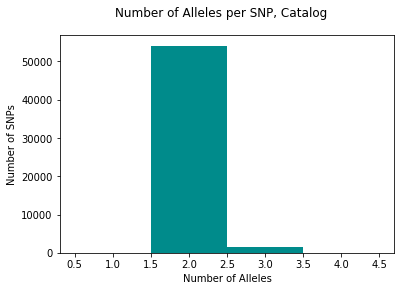

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(n_alleles_list, bins=np.arange(0,5,1)+0.5, color="darkcyan")
plt.suptitle("Number of Alleles per SNP, Catalog")
plt.xlabel("Number of Alleles")
plt.ylabel("Number of SNPs")
plt.show()

In [11]:
plt.close()

#### Per SNP in Haplotypes file

In [ ]:
infile = open("batch_8.haplotypes.tsv")
infile.readline() # header
n_alleles_list = []
for line in infile:
    haps = line.strip().split()[2:]
    bases = []
    for hap in haps:
        new_bases = hap.split("/")
        for i in new_bases:
            if i not in bases:
                bases.append(i)
    n_alleles = len(bases)
    n_alleles_list.append(n_alleles)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(n_alleles_list, color="darkcyan")
plt.suptitle("Number of Alleles per SNP, Haplotypes file")
plt.xlabel("Number of Alleles")
plt.ylabel("Number of SNPs")
plt.show()

In [ ]:
plt.close()

<br>
<br>
### MB Filtering Pipeline

#### 1/10/2018



In [1]:
cd ../scripts/PostStacksFiltering/

/mnt/hgfs/PCod-Compare-repo/scripts/PostStacksFiltering


In [2]:
!python prep_for_extraFilters.py \
../../stacks_b8_wgenome_r05/batch_8.catalog.snps.tsv \
../../stacks_b8_wgenome_r05/batch_8.catalog.snps2.tsv \
../../stacks_b8_wgenome_r05/batch_8.haplotypes.tsv \
../../stacks_b8_wgenome_r05/batch_8.haplotypes2.tsv

In [3]:
!python preparing_file_for_correcting_genotypes.py \
../../stacks_b8_wgenome_r05/batch_8.haplotypes2.tsv \
../../stacks_b8_wgenome_r05/batch_8.biallelic_catalog.tsv \
../../stacks_b8_wgenome_r05/batch_8.catalog.snps2.tsv \
1

2 549 C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C A C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C 

12 636 T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T C T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T

In [5]:
!python genotypes_verif_v2_no_ref_takeARGS_1-10.py \
../../stacks_b8_wgenome_r05 \
../PopMap_combo_b4.txt \
8

PO010715_02_92bp
PO010715_02_rep_92bp
PO010715_04_92bp
PO010715_06.1_92bp
PO010715_08.1_92bp
PO010715_10.1_92bp
PO010715_11.1_92bp
PO010715_12_92bp
PO010715_17.1_92bp
PO010715_19.1_92bp
PO010715_26_92bp
PO010715_27.1_92bp
PO010715_28.1_92bp
PO010715_29.1_92bp
PO020515_01_92bp
PO020515_03.1_92bp
PO020515_05.1_92bp
PO020515_06_92bp
PO020515_08.1_92bp
PO020515_09.1_92bp
PO020515_10.1_92bp
PO020515_14.1_92bp
PO020515_15.1_92bp
PO020515_16.1_92bp
PO020515_17.1_92bp
PO031715_03_92bp
PO031715_04_92bp
PO031715_13.1_92bp
PO031715_20.1_92bp
PO031715_23_92bp
PO031715_24_92bp
PO010715_26_2_92bp
PO010715_07_92bp
PO010715_07_rep_92bp
GE011215_01.1_92bp
GE011215_07.1_92bp
GE011215_08.1_92bp
GE011215_09.1_92bp
GE011215_10.1_92bp
GE011215_14.1_92bp
GE011215_15.1_92bp
GE011215_16.1_92bp
GE011215_18_92bp
GE011215_19_92bp
GE011215_20.1_92bp
GE011215_21.1_92bp
GE011215_22_92bp
GE011215_24.1_92bp
GE011215_28_92bp
GE011215_29.1_92bp
GE011215_30.1_92bp
GE012315_01.1_92bp
GE012315_03.1_92bp
GE012315_04.1_92bp


GS13_016
GS13_017
PWS12_001
PWS12_002
PWS12_003
PWS12_004
PWS12_005
PWS12_006
PWS12_007
PWS12_008
PWS12_009
PWS12_010
PWS12_011
PWS12_012
PWS12_013
PWS12_014
PWS12_015
PWS12_016
PWS12_017
PWS12_018
PWS12_019
PWS12_020
PWS12_021
PWS12_022
PWS12_023
PWS12_025
PWS12_031
PWS12_033
PWS12_041
PWS12_054
PWS12_055
PWS12_056
PWS12_057
PWS12_063
PWS12_064
PWS12_066
PWS12_069
PWS12_075
PWS12_076
PWS12_077
PWS12_078
PWS12_079
PWS12_094
PWS12_095
PWS12_096
PWS12_097
PWS12_131
PWS12_132
PWS12_133
PWS12_134
UP03_001
UP03_009
UP03_017
UP03_025
UP03_033
UP03_041
UP03_002
UP03_010
UP03_018
UP03_026
UP03_034
UP03_042
UP03_003
UP03_011
UP03_019
UP03_027
UP03_035
UP03_043
UP03_004
UP03_012
UP03_020
UP03_028
UP03_036
UP03_044
UP03_005
UP03_013
UP03_021
UP03_029
UP03_037
UP03_045
UP03_006
UP03_014
UP03_022
UP03_030
UP03_038
UP03_046
UP03_007
UP03_015
UP03_023
UP03_031
UP03_039
UP03_047
UP03_008
UP03_016
UP03_024
UP03_032
UP03_040
UP03_048


In [6]:
!python Genepop_conversion_corrected.py \
../../stacks_b8_wgenome_r05/batch_8.CorrectedGenotypes_biallelic.txt \
../../stacks_b8_wgenome_r05/batch_8.CorrectedGenotypes_biallelic_genepop.txt \

In [8]:
!python add_sample_to_genepop.py \
../../stacks_b8_wgenome_r05 \
8

adding 'sample' as the first column header


In [9]:
!python transpose.py \
../../stacks_b8_wgenome_r05/batch_8.CorrectedGenotypes_biallelic_genepop_edit.txt \
../../stacks_b8_wgenome_r05/batch_8.CorrectedGenotypes_biallelic_genepop_TRANSPOSED.txt \

**11,981**

<br>
### MAF Filtering

In [10]:
!python convert_genepop_to_csv.py \
../../stacks_b8_wgenome_r05 \
8

In [11]:
!python genMAFfiltering.py \
../PopMap_combo_b4.txt

You have 17 populations.
These are your populations, with the number of samples in each:
OrderedDict([('Pohang15', 34), ('Geoje15', 37), ('Namhae15', 19), ('YellowSea16', 30), ('Jukbyeon07', 37), ('JinhaeBay07', 53), ('JinhaeBay08', 56), ('Boryeong07', 24), ('Geoje14', 36), ('Kodiak03', 48), ('Adak06', 48), ('WashCoast05', 48), ('HecStrait04', 48), ('SalishSea12_13', 42), ('JuandeFuca12', 23), ('PWSound12', 48), ('UnimakPass03', 48)])


I HAD TO EDIT COLUMN INDICES BECAUSE THE SALISH SEA SAMPLES WERE NOT ALL TOGETHER IN THE POPULATION MAP

In [12]:
!python Eleni_filter_by_MinorAlleleFrequency_takeARGS_batch4.py \
../../stacks_b8_wgenome_r05/batch_8.CorrectedGenotypes_biallelic_genepop_TRANSPOSED.csv \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_freqs.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_BAD.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_BADfreqs.txt

10006	0.0	0.0	0.0	0.0	0.0138888888885	0.0104166666664	0.0096153846152	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10009	0.0147058823525	0.0135135135131	0.0	0.0172413793098	0.0	0.0326086956515	0.00980392156844	0.0208333333325	0.0151515151511	0.0232558139529	0.0116279069765	0.0	0.0	0.0	0.0	0.0	0.0
10011	0.0	0.0	0.0	0.0	0.0	0.0116279069765	0.0106382978721	0.0217391304338	0.0161290322575	0.0116279069765	0.0121951219509	0.0	0.0	0.0	0.0	0.0222222222217	0.0108695652172
10016	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.999999999971	0.987804878025	0.999999999958	0.999999999971	0.999999999967	0.999999999963	0.984374999969	0.999999999967	0.999999999947	0.999999999937	0.986842105237	0.984848484819
10035	0.0	0.0135135135131	0.0	0.0	0.0142857142853	0.0227272727268	0.0	0.0227272727262	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10037	0.0147058823525	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0113636363634	0.0	0.0	0.0	0.0
10039	0.0	0.0	0.0263157894723	0.

10302	0.0	0.0	0.0	0.0	0.0249999999988	0.0	0.0161290322575	0.0	0.0178571428565	0.0	0.0	0.0	0.0	0.0263157894723	0.0	0.0	0.0
10308	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1031	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10312	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10316	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10317	0.0	0.0	0.0263157894723	0.0	0.0	0.0108695652172	0.0102040816324	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10318	0.999999999971	0.999999999973	0.999999999947	0.966666666634	0.999999999971	0.99999999998	0.99999999998	0.978260869523	0.999999999971	0.999999999974	0.999999999971	0.999999999976	0.999999999976	0.999999999957	0.999999999947	0.999999999979	0.999999999974
1032	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.999999999981	0.999999999957	0.999999999971	0.989130434761	0.988888888867	0.978723404234	0.977777777756	0.9

10542	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10544	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10548	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10550	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10551	0.0147058823525	0.0135135135131	0.0	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10555	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10557	0.99999999997	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999975	0.999999999978	0.999999999958	0.999999999969	0.99999999997	0.999999999963	0.99999999997	0.999999999978	0.999999999944	0.999999999937	0.999999999976	0.99999999997
10559	0.0	0.0	0.0	0.0	0.0270270270263	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1056	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.987499999975	0.99999

10805	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.999999999978	0.99999999998	0.999999999958	0.999999999971	0.999999999977	0.999999999977	0.999999999978	0.999999999977	0.999999999957	0.99999999995	0.999999999979	0.999999999978
10809	0.0	0.0	0.0	0.0	0.0138888888885	0.0	0.0108695652172	0.0454545454525	0.0454545454532	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0
1081	0.999999999971	0.986111111084	0.999999999944	0.999999999958	0.99999999997	0.999999999977	0.999999999978	0.999999999957	0.99999999997	0.999999999971	0.999999999962	0.999999999963	0.999999999974	0.999999999952	0.999999999937	0.999999999974	0.999999999972
10817	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
10818	0.99999999997	0.999999999972	0.999999999937	0.999999999963	0.999999999967	0.999999999971	0.999999999974	0.999999999952	0.999999999966	0.999999999976	0.999999999972	0.999999999974	0.999999999977	0.999999999958	0.999999999947	0.999999999977	0.999999999976
10821	0.0	0.0	0

11080	0.0147058823525	0.0	0.0	0.0	0.0	0.0408163265298	0.0096153846152	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11090	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11095	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11096	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11098	0.999999999957	0.999999999952	0.999999999917	0.999999999958	0.999999999955	0.999999999952	0.999999999962	0.999999999952	0.999999999941	0.999999999964	0.999999999933	0.99999999995	0.999999999964	0.999999999941	0.999999999889	0.99999999996	0.999999999962
11099	0.0	0.0	0.0	0.0166666666661	0.0	0.0	0.01923076923	0.0217391304338	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11101	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11120	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11121	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11123	0.999999999964	0.999999999962	0.999999999929	0.999999999962	0.99999999997

113	0.99999999997	0.999999999972	0.999999999944	0.999999999964	0.984374999969	0.999999999977	0.99999999998	0.976190476144	0.999999999971	0.999999999976	0.999999999976	0.999999999974	0.999999999979	0.999999999958	0.999999999955	0.999999999979	0.999999999978
1130	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.99999999998	0.99999999998	0.999999999958	0.999999999971	0.999999999973	0.999999999964	0.999999999963	0.999999999969	0.972222222168	0.999999999941	0.999999999976	0.999999999971
11300	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999968	0.999999999976	0.999999999978	0.999999999958	0.999999999966	0.999999999978	0.999999999974	0.999999999978	0.999999999978	0.99999999996	0.999999999957	0.999999999979	0.999999999978
11301	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.99999999997	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999978	0.974358974334	0.999999999977	0.999999999976	0.999999999958	0.999999999

11529	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11533	0.0	0.0	0.0	0.0172413793098	0.0	0.0	0.0	0.0416666666649	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0249999999988	0.0	0.0
11536	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.999999999	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.999999999667	0.999999999
11543	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11545	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.999999999981	0.999999999958	0.985714285686	0.989361702107	0.958333333313	0.999999999979	0.999999999979	0.99999999996	0.978260869523	0.978723404234	0.999999999978
11546	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999977	0.999999999974	0.999999999976	0.999999999977	0.999999999955	0.999999999955	0.999999999978	0.999999999977
11563	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11569	0.999999999958

1179	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999971	0.999999999979	0.999999999981	0.999999999958	0.99999999997	0.968085106362	0.954545454524	0.999999999978	0.999999999978	0.99999999996	0.999999999957	0.978723404234	0.989583333313
11792	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11793	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11795	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0428571428559	0.0	0.0312499999993	0.0	0.0	0.0	0.0217391304338	0.0	0.0212765957442
11798	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1180	0.999999999971	0.999999999973	0.999999999947	0.982758620656	0.958333333307	0.999999999979	0.99999999998	0.979166666626	0.999999999971	0.988636363614	0.987804878025	0.968085106362	0.989361702107	0.999999999958	0.978260869523	0.989361702107	0.978260869544
11801	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
11813	0.999999999971	0.999999999973	0.999999999947	0.999999999967

12079	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12088	0.0	0.0	0.0	0.0	0.0151515151511	0.0	0.0	0.0	0.031249999999	0.0	0.0217391304338	0.0	0.0156249999995	0.0294117647042	0.0	0.0	0.0
12093	0.999999999971	0.999999999972	0.999999999947	0.999999999967	0.98648648646	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.968085106362	0.962499999976	0.999999999978	0.989130434761	0.99999999996	0.999999999957	0.978723404234	0.978723404234
12094	0.0	0.0135135135131	0.0	0.0499999999983	0.0138888888885	0.0	0.0	0.0	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12097	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1210	0.0	0.0135135135131	0.0	0.0	0.0151515151511	0.0	0.0	0.0	0.0161290322575	0.0	0.0	0.0113636363634	0.0	0.0	0.0	0.0	0.0
12100	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12107	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	

12356	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.999999999981	0.999999999957	0.999999999971	0.989583333313	0.967391304327	0.989361702107	0.968085106362	0.99999999996	0.999999999957	0.989361702107	0.979166666646
12357	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.972222222195	0.999999999974	0.999999999974	0.999999999957	0.999999999971	0.999999999967	0.999999999962	0.99999999996	0.99999999997	0.999999999941	0.999999999937	0.99999999997	0.999999999964
12358	0.0147058823525	0.0	0.0	0.0166666666661	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1236	0.0	0.999999999	0.0	0.0	0.999999999	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12360	0.029411764705	0.0	0.0	0.0	0.0135135135131	0.0	0.0204081632649	0.0416666666649	0.0322580645151	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12369	0.0	0.0	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0499999999988	0.0135135135131	0.0	0.0	0.0	0.0	0.0108695652172	0.0
12373	0.999999999971	

12596	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.959459459434	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999978	0.999999999974	0.999999999977	0.999999999977	0.999999999957	0.999999999952	0.999999999978	0.999999999978
12599	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0	0.0227272727262	0.0476190476168	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12602	0.0	0.0	0.0	0.0	0.0	0.0	0.0166666666661	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12604	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
12605	0.0156249999995	0.0142857142853	0.0	0.0178571428565	0.0	0.0147058823525	0.0	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1261	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.972972972947	0.99999999998	0.999999999982	0.999999999957	0.999999999971	0.999999999978	0.999999999974	0.999999999977	0.999999999976	0.99999999996	0.999999999957	0.999999999979	0.999999999976
12612	0.0	0.0135135135131	0.0	0.0	0.0416666666655	0.0102040816324	0.0	0.0	0.0	

12878	0.0147058823525	0.0135135135131	0.0	0.0166666666661	0.0138888888885	0.0319148936163	0.0	0.0	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0106382978721
1288	0.999999999962	0.999999999967	0.999999999947	0.99999999995	0.999999999957	0.999999999969	0.99999999997	0.999999999944	0.999999999963	0.999999999973	0.999999999964	0.999999999974	0.999999999978	0.99999999996	0.999999999947	0.999999999976	0.999999999971
12889	0.999999999964	0.999999999964	0.999999999929	0.999999999964	0.999999999972	0.999999999955	0.999999999964	0.999999999958	0.999999999968	0.999999999963	0.999999999958	0.999999999947	0.999999999962	0.999999999933	0.999999999889	0.999999999969	0.999999999968
1289	0.999999999971	0.999999999973	0.973684210475	0.999999999967	0.972972972947	0.999999999979	0.999999999979	0.999999999958	0.970588235266	0.999999999974	0.999999999971	0.999999999974	0.999999999975	0.999999999952	0.99999999995	0.999999999978	0.999999999976
12893	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

13148	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999979	0.999999999978	0.999999999957	0.99999999997	0.999999999971	0.999999999967	0.999999999968	0.999999999972	0.999999999944	0.99999999995	0.999999999976	0.999999999972
13150	0.999999999947	0.999999999957	0.999999999917	0.999999999857	0.9999999999	0.999999999962	0.999999999958	0.999999999917	0.999999999955	0.999999999957	0.999999999952	0.961538461501	0.958333333293	0.999999999909	0.999999999917	0.999999999952	0.999999999962
13153	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13163	0.999999999923	0.999999999941	0.9999999998	0.999999999889	0.999999999857	0.999999999917	0.999999999923	0.999999999833	0.999999999937	0.999999999857	0.9999999998	0.999999999667	0.999999999667	0.999999999667	0.999999999	0.999999999857	0.999999999875
13164	0.0	0.999999999667	0.0	0.999999999	0.9999999995	0.0	0.999999999	0.9999999995	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13168	0.0	0.0	0.0	0

1342	0.0	0.0	0.0	0.0166666666661	0.0138888888885	0.0	0.0	0.0	0.0	0.0357142857134	0.0	0.0	0.0	0.0238095238084	0.0249999999988	0.0111111111109	0.0
13425	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.99999999998	0.999999999958	0.999999999971	0.999999999978	0.999999999974	0.999999999977	0.999999999978	0.999999999958	0.999999999952	0.999999999979	0.999999999978
13426	0.999999999967	0.99999999997	0.999999999941	0.999999999967	0.999999999971	0.999999999963	0.999999999968	0.999999999952	0.999999999967	0.999999999971	0.999999999968	0.99999999997	0.999999999975	0.999999999947	0.999999999941	0.999999999975	0.999999999974
13431	0.0	0.0	0.0	0.0	0.0270270270263	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0108695652172	0.0	0.0	0.0	0.0108695652172
13436	0.999999999968	0.99999999997	0.999999999923	0.999999999966	0.999999999971	0.999999999971	0.999999999977	0.999999999955	0.999999999962	0.999999999975	0.999999999968	0.999999999969	0.999999999972	0.999999999947	0.9999999999

13699	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1370	0.0333333333322	0.0	0.0	0.0178571428565	0.0142857142853	0.0	0.0	0.0217391304338	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13709	0.99999999996	0.99999999996	0.999999999937	0.999999999963	0.999999999968	0.999999999958	0.999999999966	0.999999999955	0.999999999966	0.999999999952	0.999999999944	0.999999999941	0.999999999966	0.999999999923	0.999999999857	0.999999999963	0.999999999952
13713	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13714	0.0	0.0	0.0	0.0	0.0416666666655	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13715	0.0	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0217391304338	0.0285714285706	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0
13716	0.0	0.0138888888885	0.0	0.0	0.0138888888885	0.0	0.0099999999998	0.0208333333325	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13717	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999971	0.999999999979	0.999999999979	0.99999

13960	0.99999999997	0.985294117618	0.999999999941	0.979999999961	0.954545454517	0.999999999974	0.999999999978	0.978260869523	0.99999999997	0.999999999978	0.999999999977	0.999999999978	0.999999999978	0.99999999996	0.999999999952	0.999999999979	0.999999999978
13961	0.0	0.0	0.0	0.0	0.0285714285706	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13963	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.999999999979	0.99999999998	0.979166666626	0.999999999971	0.977777777756	0.959459459434	0.999999999977	0.988636363614	0.99999999996	0.976190476144	0.958333333313	0.999999999976
13968	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13977	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13979	0.0	0.0	0.0	0.0	0.0	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13982	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
13986	0.999999999971	0.999999999972	0.999999999944	0.999999999964	0.999999999973	0.999999

14257	0.0	0.0	0.0	0.0	0.0	0.0121951219509	0.0	0.0	0.0	0.0121951219509	0.0	0.0128205128202	0.0	0.0	0.0249999999988	0.0222222222217	0.0138888888885
14269	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1427	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999971	0.999999999976	0.999999999978	0.999999999958	0.999999999971	0.999999999974	0.999999999969	0.999999999968	0.999999999976	0.99999999995	0.999999999944	0.999999999978	0.999999999975
14270	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0454545454535	0.0131578947365	0.0121951219509	0.0232558139529	0.0	0.0	0.0	0.0227272727268
14273	0.0147058823525	0.0135135135131	0.0263157894723	0.0	0.0135135135131	0.0	0.0	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14276	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0116279069765	0.0285714285706	0.0	0.0454545454535	0.0	0.0	0.0232558139529	0.0
14277	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999975	0.999999999979	0.999999999957	0.999

14498	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.999999999972	0.999999999967	0.999999999968	0.954545454517	0.949999999952	0.972222222168	0.999999999977	0.999999999973
14499	0.999999999667	0.0	0.0	0.999999999	0.999999999	0.9999999995	0.999999999667	0.0	0.0	0.999999999875	0.99999999975	0.999999999667	0.999999999857	0.99999999975	0.9999999995	0.999999999857	0.999999999667
14504	0.99999999997	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999974	0.999999999978	0.999999999958	0.999999999971	0.98648648646	0.999999999964	0.999999999968	0.999999999972	0.999999999941	0.999999999941	0.999999999975	0.973684210501
14511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14520	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14522	0.9999999995	0.9999999995	0.9999999995	0.999999999857	0.9999999995	0.99999999975	0.9999999995	0.999999999	0.999999999	0.0	

148	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14801	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14804	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14809	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14811	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
14826	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.990740740722	0.979166666626	0.999999999969	0.999999999978	0.999999999978	0.999999999978	0.999999999978	0.999999999958	0.999999999955	0.999999999979	0.999999999978
14827	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0156249999995	0.0	0.0	0.0128205128202	0.0	0.0	0.0	0.0	0.0
14828	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.99999999997	0.982758620656	0.999999999974	0.999999999955	0.999999999971	0.999999999963	0.999999999944	0.999999999947	0.999999999952	0.999999999937	0.999999999909	0.999999

15095	0.0	0.0135135135131	0.0	0.0172413793098	0.0	0.0	0.0	0.0	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0113636363634
15099	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15106	0.970588235266	0.972972972947	0.999999999947	0.999999999966	0.98648648646	0.999999999979	0.999999999981	0.979166666626	0.970588235266	0.999999999978	0.999999999976	0.999999999977	0.999999999977	0.999999999958	0.999999999957	0.999999999979	0.999999999978
15107	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999978	0.99999999998	0.999999999958	0.999999999971	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15111	0.954545454517	0.986111111084	0.999999999947	0.999999999967	0.999999999969	0.978723404234	0.98999999998	0.999999999957	0.999999999968	0.999999999667	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995
1512	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999973	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.965116279047	0.999999999974	0.988095238

15333	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15336	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15337	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999971	0.999999999974	0.999999999979	0.999999999957	0.999999999971	0.999999999974	0.999999999967	0.999999999968	0.999999999966	0.999999999947	0.999999999941	0.999999999977	0.999999999971
15339	0.999999999967	0.999999999969	0.999999999937	0.999999999966	0.999999999973	0.999999999974	0.999999999978	0.999999999958	0.999999999971	0.999999999979	0.999999999973	0.988372093	0.999999999978	0.999999999957	0.999999999955	0.999999999979	0.999999999977
1534	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15346	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.972222222195	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.999999999977	0.999999999976	0.999999999976	0.999999999977	0.999999999957	0.99999999995

15646	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15653	0.0	0.0270270270263	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0124999999997	0.0
15661	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15663	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15664	0.984848484819	0.999999999973	0.999999999947	0.999999999967	0.986111111084	0.98999999998	0.999999999981	0.979166666626	0.999999999971	0.978723404234	0.999999999971	0.965116279047	0.953488372071	0.999999999958	0.974999999951	0.999999999979	0.999999999978
15668	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1567	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15671	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.999999999978	0.999999999977	0.999999999976	0.999999999978	0.999999999958	0.999999999955	0.999999999979	0.999999999977
15677

15863	0.0	0.0	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15870	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15872	0.0	0.0142857142853	0.0	0.0	0.0416666666655	0.0	0.0131578947365	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1588	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999971	0.999999999974	0.999999999979	0.999999999955	0.999999999969	0.999999999972	0.999999999968	0.999999999968	0.999999999974	0.999999999947	0.999999999944	0.999999999977	0.999999999975
15880	0.0	0.0	0.0	0.0	0.0405405405394	0.0	0.0	0.0	0.0	0.0319148936163	0.0116279069765	0.0	0.0	0.0	0.0	0.0	0.0333333333326
15881	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0227272727262	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15888	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.029411764705	0.0	0.0	0.0	0.0	0.0208333333325	0.0	0.0104166666664	0.0
15891	0.0	0.0	0.0357142857117	0.0172413793098	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
15898	0.0	0

16091	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.999999999667	0.999999999	0.0	0.0	0.0	0.9999999995	0.99999999975
16096	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0	0.0	0.0142857142853	0.0106382978721	0.0111111111109	0.0	0.0108695652172	0.0199999999992	0.0	0.0	0.0
16107	0.999999999	0.999999999	0.0	0.999999999667	0.9999999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16108	0.0	0.0	0.0263157894723	0.0	0.0147058823525	0.0	0.0	0.0	0.031249999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16109	0.970588235266	0.999999999973	0.999999999947	0.999999999967	0.971428571401	0.964285714263	0.965909090887	0.979166666626	0.999999999971	0.999999999977	0.999999999971	0.999999999971	0.999999999976	0.999999999957	0.999999999952	0.999999999978	0.999999999977
16111	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16112	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0322580645151	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16115	0.999999999971	0.999999999973	0.999999999947	0.983333333301	0.972222222195	0.99999999998

16366	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16369	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1637	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16370	0.0172413793098	0.0	0.0	0.0	0.0	0.0128205128202	0.0270270270263	0.0	0.0	0.0	0.0	0.0263157894723	0.0	0.0	0.0	0.0	0.0
16371	0.0	0.0135135135131	0.0	0.0166666666661	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0357142857117	0.0	0.0	0.0	0.0	0.0
16375	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0106382978721	0.0199999999992	0.0	0.0	0.0
16378	0.999999999971	0.98648648646	0.999999999947	0.999999999966	0.999999999973	0.99999999997	0.999999999977	0.999999999952	0.999999999971	0.999999999974	0.999999999964	0.999999999971	0.999999999977	0.999999999941	0.99999999995	0.999999999974	0.999999999975
1638	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0
16383	0.0151515151511	0.0135135135131	0.0	0.0	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

16600	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16601	0.0	0.0285714285706	0.0	0.0	0.0303030303021	0.0	0.0	0.0	0.0166666666661	0.0	0.0138888888885	0.0	0.0	0.0238095238084	0.0	0.0	0.0
16605	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0217391304343	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16613	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.99999999997	0.999999999976	0.999999999957	0.99999999997	0.999999999975	0.999999999969	0.99999999997	0.999999999971	0.999999999947	0.999999999933	0.999999999974	0.999999999973
16614	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16618	0.0	0.0	0.0	0.0185185185178	0.0	0.0	0.0249999999994	0.0	0.0178571428565	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16629	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16633	0.0172413793098	0.0166666666661	0.0	0.0	0.0185185185178	0.0	0.0357142857134	0.0294117647042	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16634	0.0	0.0	0.0	0.0	0.0	0.0	0.

16881	0.0147058823525	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0108695652172	0.0	0.0	0.0	0.0
16883	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16888	0.0	0.0	0.0333333333311	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1689	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.01923076923	0.0	0.0	0.0	0.0	0.0	0.0
16891	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16894	0.0	0.0138888888885	0.0277777777762	0.0	0.0	0.0	0.0	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16896	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16897	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16901	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16902	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
16911	0.0147058823525	0.0	0.0	0.0	0.0405405405394	0.0	0.0108695652172	0.0	0.0147058823525	0.0119047619045	0.0	0.0	0.0	0.0217391304338	0.0	0.0106382978721	0.0
16918	0.0

17121	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.999999999976	0.99999999998	0.999999999958	0.999999999971	0.999999999977	0.999999999972	0.999999999974	0.999999999977	0.99999999996	0.999999999952	0.999999999978	0.999999999977
1715	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17150	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999978	0.999999999981	0.999999999958	0.999999999971	0.999999999978	0.999999999975	0.999999999975	0.999999999978	0.999999999957	0.999999999952	0.999999999979	0.999999999977
17152	0.9999999995	0.999999999667	0.999999999	0.99999999975	0.999999999667	0.999999999857	0.999999999833	0.999999999667	0.99999999975	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17158	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0344827586195	0.0	0.0	0.0	0.0	0.0340909090901	0.0
1716	0.0	0.0	0.0	0.0172413793098	0.0	0.0135135135131	0.0	0.0416666666649	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0138888888885
17161	0.0	0.0	0.0	0.0	

17385	0.0	0.0	0.0263157894723	0.0	0.0	0.0	0.0	0.0	0.0161290322575	0.0	0.0	0.0	0.0138888888885	0.0	0.0294117647042	0.0	0.0
1739	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17390	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999979	0.99999999998	0.999999999957	0.985714285686	0.999999999957	0.999999999929	0.999999999957	0.999999999969	0.999999999944	0.999999999929	0.999999999964	0.999999999944
17394	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17395	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999978	0.999999999978	0.999999999958	0.999999999971	0.967391304327	0.989361702107	0.989361702107	0.978723404234	0.99999999996	0.977272727228	0.999999999978	0.95744680849
17398	0.969696969668	0.999999999972	0.999999999947	0.965517241346	0.954545454517	0.96874999998	0.989583333313	0.978260869523	0.955882352913	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999
17399	0.0	0.0	0.0	0.0	0.

1768	0.029411764705	0.0	0.0	0.0	0.027777777777	0.0	0.0	0.0217391304338	0.0	0.0111111111109	0.0357142857134	0.0108695652172	0.0111111111109	0.0399999999984	0.0454545454525	0.0	0.0319148936163
17681	0.0	0.0135135135131	0.0	0.0	0.0	0.0104166666664	0.0	0.0	0.0	0.0106382978721	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1769	0.0	0.0	0.0263157894723	0.0172413793098	0.0	0.023809523809	0.0	0.0227272727262	0.0285714285706	0.0	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0
17690	0.999999999971	0.999999999973	0.999999999947	0.983333333301	0.971428571401	0.999999999976	0.977272727251	0.999999999957	0.99999999997	0.999999999977	0.999999999971	0.999999999974	0.999999999974	0.999999999955	0.99999999995	0.988888888867	0.989130434761
17694	0.0	0.0	0.0	0.0333333333322	0.0	0.0	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0	0.0
17700	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0113636363634	0.0	0.0357142857134	0.0	0.0227272727262	0.0249999999988	0.0212765957442	0.0108695652172
17701	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

17952	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17953	0.0	0.0	0.0	0.0	0.0151515151511	0.0	0.0	0.0	0.0303030303021	0.0	0.01923076923	0.0	0.031249999999	0.0	0.0	0.0	0.0
17955	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17958	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17966	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0121951219509	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17967	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17969	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.029411764705	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17976	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17980	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17984	0.0	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
17985	0.999999999966	0.99999999997	0.999999999929	0.99999999995	0.99999999996	0.999999999976	0.999999999978	0.999999999952	0.999999999968	0.9999999

18217	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18218	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18221	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18222	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.029411764705	0.0	0.0	0.0185185185178	0.0	0.0	0.0	0.0	0.0
18225	0.0	0.0135135135131	0.0	0.0	0.0142857142853	0.0	0.0	0.0434782608677	0.0428571428559	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18229	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.985714285686	0.987499999975	0.999999999957	0.999999999971	0.999999999974	0.999999999967	0.999999999969	0.999999999976	0.99999999995	0.99999999995	0.999999999976	0.999999999974
1823	0.0	0.0	0.0	0.0	0.0135135135131	0.0208333333329	0.0377358490559	0.0	0.029411764705	0.0	0.0	0.0	0.0131578947365	0.0	0.0	0.0	0.0
18235	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18237	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18238	0.9999

18482	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18484	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0243902439018	0.0	0.0199999999992	0.0	0.0	0.0348837209294
18491	0.984848484819	0.98648648646	0.999999999947	0.999999999966	0.985714285686	0.999999999975	0.989583333313	0.999999999952	0.99999999997	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18492	0.0	0.0	0.0263157894723	0.0	0.0147058823525	0.0	0.0	0.0217391304338	0.029411764705	0.0	0.0	0.0106382978721	0.0	0.0	0.0	0.0	0.0
18498	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
185	0.0	0.0	0.0	0.0333333333322	0.0135135135131	0.0	0.0	0.0	0.0151515151511	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0	0.0
1850	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18504	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18510	0.0	0.0	0.0263157894723	0.0344827586195	0.0	0.0	0.0	0.0208333333325	0.0	0.0124999999997	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18511	0.999999999971	0.999999999973	0.999

18761	0.0	0.029411764705	0.0	0.0185185185178	0.0322580645151	0.0249999999994	0.0	0.0454545454525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18764	0.0	0.0	0.0	0.01923076923	0.0	0.0	0.0142857142853	0.0	0.0199999999992	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18766	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0116279069765	0.0	0.0	0.0	0.0	0.0	0.0119047619045	0.0
18768	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
18776	0.0	0.0	0.0	0.0	0.0227272727262	0.0	0.0	0.0	0.0	0.0111111111109	0.0232558139529	0.0	0.0	0.0	0.0	0.0	0.0
18779	0.0	0.0	0.0294117647042	0.0	0.0135135135131	0.0	0.0	0.0	0.0303030303021	0.0	0.0	0.0113636363634	0.0	0.0227272727262	0.0	0.0	0.0
18780	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999973	0.999999999976	0.999999999955	0.999999999971	0.999999999979	0.99999999997	0.999999999973	0.96874999998	0.999999999958	0.999999999955	0.967391304327	0.999999999977
18781	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

1904	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0142857142853	0.0135135135131	0.0322580645151	0.0151515151511	0.0405405405394	0.0238095238084	0.0	0.0	0.0
19043	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999979	0.99999999998	0.999999999958	0.999999999969	0.999999999975	0.999999999967	0.999999999958	0.999999999971	0.999999999952	0.999999999947	0.999999999976	0.99999999997
19045	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.999999999975	0.999999999974	0.999999999955	0.999999999971	0.999999999977	0.999999999974	0.999999999969	0.999999999976	0.999999999952	0.99999999995	0.999999999977	0.999999999975
19056	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1906	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.972972972947	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999979	0.999999999976	0.999999999979	0.999999999979	0.99999999996	0.999999999957	0.999999999978	0.999999999978
1906

19301	0.0	0.0	0.0	0.0	0.0	0.0119047619045	0.0	0.0	0.0147058823525	0.0	0.0208333333325	0.0	0.0	0.0	0.031249999998	0.0	0.0
19304	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.999999999	0.0	0.0	0.999999999	0.999999999	0.999999999	0.9999999995	0.999999999	0.0
19306	0.999999999	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19310	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19312	0.999999999971	0.999999999972	0.999999999944	0.999999999964	0.999999999969	0.999999999947	0.999999999962	0.999999999955	0.999999999962	0.99999999995	0.999999999933	0.999999999923	0.999999999944	0.999999999923	0.9999999999	0.999999999944	0.99999999995
19313	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19315	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999972	0.999999999966	0.999999999971	0.977272727228	0.999999999971	0.999999999979	0.999999999971	0.999999999976	0.999999999979	0.999999999955	0.999999999957	0.999999999977	0.99999

19607	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19609	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999972	0.999999999979	0.99999999998	0.999999999957	0.999999999969	0.988636363614	0.999999999973	0.988095238072	0.988636363614	0.99999999996	0.99999999995	0.999999999978	0.954545454524
19611	0.999999999971	0.999999999972	0.999999999947	0.999999999962	0.999999999972	0.99999999997	0.999999999971	0.999999999955	0.99999999997	0.999999999974	0.99999999996	0.999999999963	0.999999999976	0.999999999947	0.999999999937	0.999999999975	0.999999999971
19616	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1962	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19621	0.0	0.0	0.031249999998	0.0	0.0428571428559	0.0	0.0106382978721	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19622	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19625	0.99999999997	0.999999999973	0.999999999947	0.999999999964	0.99999

19873	0.0	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0151515151511	0.0	0.023809523809	0.0	0.0	0.0	0.0	0.0	0.0
19876	0.0	0.0	0.0	0.0	0.0151515151511	0.0	0.0	0.0	0.0	0.027777777777	0.0	0.0	0.0	0.0	0.0	0.0119047619045	0.0124999999997
19881	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19883	0.999999999971	0.999999999973	0.999999999947	0.966666666634	0.98648648646	0.999999999979	0.999999999981	0.999999999958	0.99999999997	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999
19884	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
1989	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19890	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999975	0.999999999976	0.999999999957	0.999999999971	0.999999999977	0.999999999971	0.999999999971	0.999999999977	0.999999999955	0.99999999995	0.999999999976	0.999999999977
19891	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
19892	0.0	0.027777777777	0.0

20159	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2016	0.0	0.0	0.0	0.0172413793098	0.0156249999995	0.0	0.0249999999994	0.0	0.0147058823525	0.0	0.0	0.029411764705	0.0	0.0	0.0	0.0	0.0
20165	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0142857142853	0.031249999999	0.0	0.0	0.0	0.0	0.0119047619045	0.0384615384606
20166	0.999999999957	0.979999999961	0.999999999889	0.999999999933	0.999999999941	0.999999999941	0.999999999952	0.999999999933	0.99999999996	0.952380952336	0.999999999889	0.958333333293	0.999999999973	0.999999999933	0.999999999933	0.999999999967	0.999999999952
20167	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20168	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20178	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2018	0.0	0.0270270270263	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20186	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20189	0.

20447	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2045	0.0	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20457	0.999999999971	0.999999999972	0.999999999947	0.999999999967	0.999999999972	0.999999999973	0.999999999973	0.999999999957	0.999999999969	0.999999999976	0.999999999971	0.999999999971	0.999999999974	0.999999999952	0.999999999944	0.999999999976	0.999999999976
20460	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20472	0.999999999971	0.98648648646	0.999999999947	0.999999999966	0.999999999972	0.99999999998	0.99999999998	0.999999999958	0.99999999997	0.999999999977	0.999999999975	0.999999999975	0.999999999976	0.999999999955	0.99999999995	0.999999999979	0.999999999975
20473	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20476	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20479	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20481	0.9999

20717	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2072	0.999999999971	0.999999999972	0.999999999947	0.999999999966	0.970588235266	0.999999999974	0.999999999979	0.999999999957	0.999999999969	0.99999999997	0.999999999957	0.99999999996	0.999999999964	0.999999999944	0.999999999944	0.999999999975	0.999999999968
20720	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20721	0.0	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20724	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20728	0.0	0.0	0.0263157894723	0.0166666666661	0.0138888888885	0.0256410256404	0.0106382978721	0.0416666666649	0.0142857142853	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20729	0.0	0.0	0.0	0.0166666666661	0.0405405405394	0.0104166666664	0.0	0.0208333333325	0.0151515151511	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0	0.0
20731	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
20735	0.0147058823525	0.

21000	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21004	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0172413793098	0.01923076923	0.0142857142853	0.0	0.0	0.0	0.0
21010	0.99999999997	0.999999999973	0.999999999947	0.999999999964	0.999999999971	0.999999999974	0.999999999976	0.978260869523	0.999999999969	0.999999999972	0.999999999968	0.999999999964	0.99999999997	0.999999999952	0.999999999947	0.999999999975	0.999999999972
21012	0.0	0.0	0.0263157894723	0.0	0.0135135135131	0.0113636363634	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21016	0.999999999	0.0	0.0	0.0	0.9999999995	0.0	0.999999999	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21017	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999979	0.99999999998	0.999999999957	0.999999999971	0.987499999975	0.999999999974	0.999999999976	0.999999999974	0.999999999957	0.972222222168	0.999999999978	0.988095238072
21028	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.972972

21272	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0441176470575	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0	0.0
21276	0.029411764705	0.0	0.0	0.0	0.0270270270263	0.0102040816324	0.0	0.0	0.0303030303021	0.0	0.029411764705	0.0	0.0	0.0	0.0	0.0	0.0
21284	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0434782608677	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21286	0.999999999971	0.999999999972	0.999999999947	0.999999999966	0.999999999971	0.999999999975	0.999999999975	0.999999999957	0.999999999971	0.999999999977	0.99999999997	0.999999999971	0.999999999974	0.999999999944	0.99999999995	0.999999999978	0.999999999976
21296	0.0	0.0	0.0	0.0166666666661	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21297	0.999999999971	0.972972972947	0.999999999947	0.983333333301	0.972972972947	0.999999999977	0.999999999979	0.999999999958	0.999999999971	0.999999999958	0.99999999996	0.999999999962	0.999999999968	0.999999999929	0.999999999923	0.999999999973	0.999999999967
213	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

21556	0.0147058823525	0.0138888888885	0.0	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0119047619045	0.0	0.0	0.0111111111109	0.0
21559	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0113636363634
21561	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21562	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21565	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.98648648646	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999973	0.999999999967	0.999999999971	0.999999999974	0.949999999952	0.999999999944	0.999999999978	0.999999999974
21569	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0277777777762	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21576	0.0	0.0	0.0	0.999999999	0.9999999995	0.0	0.0	0.0	0.0	0.0	0.999999999667	0.0	0.0	0.0	0.0	0.999999999	0.0
21582	0.0227272727262	0.0185185185178	0.0	0.0333333333322	0.0	0.0333333333311	0.0	0.0249999999988	0.0156249999995	0.0124999999997	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21586	0.0	0

21793	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995	0.9999999995	0.999999999	0.99999999975	0.0	0.999999999	0.999999999	0.999999999
21796	0.99999999997	0.999999999972	0.999999999947	0.99999999996	0.999999999966	0.999999999958	0.999999999967	0.999999999952	0.999999999969	0.999999999966	0.999999999937	0.999999999944	0.99999999996	0.999999999941	0.999999999937	0.982142857108	0.99999999996
21799	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0
21801	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21803	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21807	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
21808	0.955882352913	0.999999999973	0.999999999947	0.999999999967	0.98648648646	0.98648648646	0.999999999978	0.999999999957	0.985714285686	0.999999999973	0.999999999968	0.999999999966	0.999999999977	0.999999999937	0.999999999937	0.999999999976	0.999999999974
21811	0.999999999968	0.99999999997	0.999999999

2207	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.972972972947	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999963	0.999999999963	0.999999999958	0.999999999967	0.999999999944	0.999999999937	0.999999999974	0.999999999968
22070	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22072	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22081	0.999999999964	0.999999999968	0.999999999929	0.999999999957	0.999999999968	0.999999999962	0.999999999971	0.999999999955	0.999999999957	0.999999999917	0.999999999923	0.999999999909	0.999999999923	0.999999999833	0.99999999975	0.999999999937	0.999999999917
22086	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22091	0.999999999971	0.999999999972	0.999999999947	0.999999999964	0.999999999971	0.999999999977	0.999999999979	0.999999999958	0.999999999963	0.999999999978	0.988636363614	0.999999999977	0.999999999979	0.999999999955	0.99999999995	0.999999999978	0.987499999975

22367	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.999999999	0.0	0.0
22370	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22374	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22378	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22379	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2238	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.999999999977	0.99999999998	0.979166666626	0.999999999971	0.977777777756	0.965116279047	0.999999999978	0.999999999978	0.99999999996	0.999999999955	0.989130434761	0.968085106362
22382	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22383	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.985714285686	0.999999999968	0.999999999972	0.954545454502	0.999999999971	0.999999999974	0.999999999962	0.999999999966	0.999999999974	0.999999999944	0.999999999947	0.999999999973	0.999999999969
22388	0.9

22644	0.985294117618	0.999999999973	0.999999999941	0.999999999957	0.957142857116	0.999999999972	0.999999999972	0.999999999955	0.985714285686	0.999999999973	0.999999999963	0.999999999967	0.99999999997	0.999999999944	0.999999999941	0.999999999976	0.999999999972
22647	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22648	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22649	0.0	0.0	0.0	0.0	0.0	0.0227272727268	0.0	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0104166666664	0.0
22653	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0217391304338	0.0	0.0	0.0
2266	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22661	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22665	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.972222222195	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999958	0.999999999962	0.999999999955	0.999999999958	0.999999999944	0.999999999929	0.999999999

22911	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22913	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22917	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22918	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.9999999995	0.0	0.0	0.999999999	0.0	0.0	0.999999999
22924	0.0	0.0135135135131	0.0	0.0	0.0	0.0256410256404	0.0	0.0	0.0	0.0	0.0	0.0	0.0124999999997	0.0	0.0	0.0	0.0
22925	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22931	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22938	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22940	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0322580645151	0.0249999999994	0.0	0.0	0.0232558139529	0.0499999999983
22941	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
22942	0.0151515151511	0.0	0.0263157894723	0.0	0.0	0.0131578947365	0.0	0.0	0.0156249999995	0.0	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0
2

23199	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
23201	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999971	0.999999999977	0.999999999978	0.999999999958	0.99999999997	0.99999999997	0.999999999964	0.999999999967	0.999999999972	0.999999999937	0.999999999941	0.999999999976	0.999999999973
23207	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
23211	0.999999999971	0.98648648646	0.973684210475	0.999999999966	0.985714285686	0.988888888867	0.979591836715	0.999999999958	0.955882352913	0.999999999977	0.999999999973	0.999999999976	0.999999999977	0.999999999957	0.999999999952	0.999999999979	0.999999999978
23215	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0104166666664	0.0111111111109
23217	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999978	0.99999999998	0.999999999957	0.999999999971	0.989361702107	0.999999999978	0.999999999978	0.999999999979	0.999999999958	0.999999

23454	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999979	0.999999999982	0.999999999958	0.999999999971	0.999999999979	0.999999999978	0.989361702107	0.999999999979	0.99999999996	0.999999999957	0.989130434761	0.988636363614
23456	0.0227272727262	0.0199999999992	0.0	0.0	0.0	0.0	0.0263157894723	0.0416666666632	0.0	0.0166666666661	0.0	0.0399999999984	0.0	0.0	0.0	0.0128205128202	0.0399999999984
2346	0.0	0.0	0.0294117647042	0.0	0.0	0.0111111111109	0.0113636363634	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
23462	0.999999999962	0.999999999955	0.999999999937	0.999999999967	0.99999999997	0.999999999967	0.999999999972	0.999999999957	0.999999999967	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995
23463	0.99999999996	0.999999999967	0.999999999923	0.999999999944	0.999999999937	0.999999999909	0.999999999952	0.999999999889	0.999999999923	0.9999999995	0.0	0.9999999995	0.999999999	0.999999999	0.999999999667	0.9999999995	0.999999999667
2347	0.999999999971	0.999999999973	

23795	0.0	0.0	0.0	0.0	0.0142857142853	0.0147058823525	0.0121951219509	0.0	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
23798	0.999999999971	0.972972972947	0.999999999947	0.982758620656	0.999999999972	0.99999999998	0.999999999981	0.978260869523	0.999999999971	0.999999999978	0.999999999976	0.977777777756	0.989130434761	0.999999999958	0.954545454502	0.999999999979	0.988888888867
2380	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.999999999979	0.999999999981	0.999999999958	0.999999999971	0.999999999978	0.999999999978	0.999999999977	0.999999999978	0.999999999958	0.999999999955	0.999999999978	0.999999999979
23800	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
23810	0.0	0.0	0.0263157894723	0.0	0.0	0.0106382978721	0.0	0.0	0.0	0.0	0.0	0.0256410256404	0.0131578947365	0.0	0.0	0.0	0.0111111111109
23811	0.9999999995	0.999999999	0.9999999995	0.999999999667	0.0	0.0	0.9999999995	0.999999999833	0.999999999667	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
23812	0.

24068	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24069	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24072	0.0	0.0	0.0	0.0	0.0	0.0	0.0185185185182	0.0416666666649	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24082	0.99999999997	0.999999999971	0.999999999947	0.999999999966	0.951612903195	0.999999999976	0.999999999977	0.958333333293	0.999999999969	0.999999999978	0.999999999974	0.999999999976	0.999999999977	0.999999999958	0.999999999955	0.999999999979	0.999999999977
24086	0.999999999971	0.999999999973	0.999999999944	0.999999999967	0.999999999971	0.999999999973	0.999999999977	0.999999999958	0.999999999968	0.999999999977	0.999999999972	0.999999999976	0.999999999975	0.999999999958	0.999999999947	0.999999999977	0.999999999977
24087	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995	0.0	0.0	0.0
24092	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.972222222195	0.999999999976	0.99999999998	0.999999999958	0.99999999997

24356	0.999999999971	0.999999999973	0.999999999947	0.983333333301	0.972222222195	0.99999999998	0.999999999981	0.999999999958	0.99999999997	0.999999999977	0.999999999978	0.999999999978	0.999999999978	0.999999999958	0.999999999952	0.999999999979	0.999999999978
24358	0.029411764705	0.027777777777	0.0	0.0333333333322	0.0	0.0	0.0108695652172	0.0	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24359	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24364	0.0	0.0	0.0	0.0	0.0	0.049999999999	0.0181818181815	0.0208333333325	0.0441176470575	0.0106382978721	0.0	0.0111111111109	0.0	0.0199999999992	0.0	0.0	0.0217391304343
24373	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.985714285686	0.99999999998	0.999999999981	0.958333333293	0.999999999971	0.999999999974	0.999999999967	0.999999999976	0.954545454524	0.999999999955	0.99999999995	0.978260869544	0.986842105237
24378	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999979	0.999999999

24635	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.999999999978	0.999999999981	0.999999999958	0.999999999971	0.999999999977	0.999999999974	0.999999999976	0.999999999977	0.999999999958	0.99999999995	0.999999999979	0.999999999978
2464	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24642	0.0	0.0	0.0	0.0	0.029411764705	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24644	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999977	0.999999999979	0.999999999958	0.999999999971	0.999999999976	0.999999999974	0.976190476167	0.999999999978	0.999999999957	0.99999999995	0.999999999979	0.999999999977
24650	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0178571428565	0.0151515151511	0.0	0.0	0.0	0.0344827586195
24655	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.999999999	0.0	0.0	0.0	0.999999999667	0.0
24671	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999973	0.999999999978	0.99999

24875	0.970588235266	0.98648648646	0.973684210475	0.999999999967	0.999999999972	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.989361702107	0.999999999978	0.999999999979	0.999999999979	0.979999999961	0.978260869523	0.999999999979	0.999999999978
24876	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24878	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24879	0.0147058823525	0.0	0.0	0.0	0.0151515151511	0.0	0.0142857142853	0.0238095238084	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0128205128202
2488	0.0	0.0138888888885	0.0	0.0	0.0	0.0111111111109	0.0192307692304	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
24880	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999975	0.99999999998	0.999999999958	0.999999999971	0.999999999977	0.999999999972	0.999999999972	0.999999999979	0.999999999958	0.999999999944	0.999999999979	0.999999999977
24889	0.0	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

25112	0.029411764705	0.0135135135131	0.0	0.0	0.0151515151511	0.0	0.0138888888885	0.0	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25114	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25129	0.999999999	0.0	0.99999999975	0.999999999	0.999999999	0.0	0.9999999995	0.999999999	0.0	0.999999999955	0.999999999933	0.999999999952	0.999999999962	0.999999999929	0.999999999917	0.999999999967	0.999999999947
25130	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25133	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25137	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999972	0.999999999971	0.999999999974	0.999999999957	0.999999999971	0.999999999978	0.999999999976	0.999999999976	0.999999999979	0.999999999957	0.999999999957	0.999999999978	0.999999999977
2514	0.0147058823525	0.0	0.0263157894723	0.0	0.0	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0172413793098
25144	0.0	0.0	0.0	0.0	0.027777777777	0.0	0

25358	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0
25362	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25366	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25372	0.999999999933	0.999999999917	0.999999999833	0.999999999962	0.98648648646	0.999999999978	0.999999999979	0.999999999958	0.999999999967	0.999999999979	0.999999999977	0.999999999977	0.999999999979	0.999999999957	0.999999999955	0.999999999979	0.999999999978
25380	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25393	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25394	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0238095238084	0.0	0.0	0.0294117647042	0.0	0.0	0.0	0.0	0.0	0.0
2540	0.999999999971	0.999999999973	0.973684210475	0.999999999967	0.959459459434	0.999999999976	0.989795918347	0.979166666626	0.999999999971	0.999999999978	0.999999999979	0.976744186024	0.989583333313	0.99999999996	0.999999999952	0.999999999979	0.999999999979
25409

25644	0.999999999929	0.999999999917	0.999999999857	0.999999999963	0.958333333307	0.999999999979	0.98076923075	0.979166666626	0.955882352913	0.989583333313	0.954545454524	0.999999999979	0.999999999979	0.979999999961	0.999999999955	0.989361702107	0.999999999979
25646	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25647	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25649	0.0357142857117	0.0	0.0	0.01923076923	0.027777777777	0.0	0.0326086956515	0.0208333333325	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2565	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999973	0.989583333313	0.99999999998	0.999999999958	0.999999999971	0.978723404234	0.999999999978	0.999999999979	0.95652173911	0.99999999996	0.999999999955	0.978723404234	0.978260869544
25650	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
25655	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0487804878037	0.0
25657	0.0	0.0	0.0	0.0	0.03124999

2774	0.999999999971	0.98648648646	0.999999999947	0.999999999967	0.999999999971	0.989583333313	0.990566037717	0.999999999958	0.984848484819	0.999999999978	0.999999999976	0.988636363614	0.999999999978	0.99999999996	0.999999999955	0.989583333313	0.999999999978
2787	0.999999999971	0.999999999971	0.999999999947	0.999999999966	0.999999999971	0.999999999977	0.99999999998	0.999999999958	0.99999999997	0.999999999962	0.999999999944	0.999999999917	0.999999999952	0.999999999	0.999999999857	0.999999999963	0.999999999958
2789	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
279	0.0147058823525	0.0135135135131	0.0	0.0	0.0135135135131	0.00980392156844	0.00943396226397	0.0208333333325	0.0147058823525	0.0	0.0212765957442	0.0	0.0	0.0	0.0	0.0	0.0
2793	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2797	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2798	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999
2799	0.0	

3031	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3046	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0
3050	0.0147058823525	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0322580645151	0.0	0.0	0.01923076923	0.0	0.0	0.0	0.0	0.0
3053	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995	0.0	0.999999999875	0.9999999995	0.99999999975	0.999999999857	0.999999999833	0.9999999995	0.999999999667	0.9999999995
3057	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999977	0.99999999998	0.999999999958	0.99999999997	0.987804878025	0.999999999968	0.999999999971	0.999999999975	0.999999999955	0.99999999995	0.999999999978	0.999999999976
307	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0208333333325	0.0285714285706	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3071	0.0	0.0	0.0	0.0	0.0	0.0	0.0104166666664	0.0	0.0441176470575	0.0111111111109	0.0	0.0340909090901	0.0	0.0	0.0	0.0	0.0
3072	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3076	0.0	

3304	0.0	0.0	0.0	0.0	0.0142857142853	0.0	0.0270270270263	0.0	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3309	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0196078431369	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3316	0.0	0.0	0.0	0.0	0.0	0.0	0.9999999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3320	0.0	0.0270270270263	0.0	0.0499999999983	0.0270270270263	0.0	0.00925925925909	0.0217391304338	0.0	0.0	0.0116279069765	0.0	0.0	0.0	0.0	0.0	0.0
3325	0.99999999995	0.999999999952	0.999999999929	0.9999999999	0.999999999955	0.99999999995	0.999999999952	0.999999999937	0.99999999995	0.999999999937	0.999999999875	0.999999999857	0.999999999941	0.999999999667	0.999999999857	0.999999999937	0.999999999947
3326	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3328	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0
3329	0.0	0.0	0.0263157894723	0.0	0.0416666666655	0.0111111111109	0.0	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3334	0.0	0.0	0.0	0.0	0.0

3566	0.0	0.0	0.0	0.0	0.0	0.0099999999998	0.0102040816324	0.0208333333325	0.029411764705	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3573	0.0	0.0	0.0	0.0499999999983	0.0	0.0108695652172	0.00980392156844	0.0217391304338	0.0	0.0	0.0131578947365	0.0	0.0	0.0	0.0	0.0	0.0
3574	0.999999999968	0.999999999964	0.999999999944	0.999999999955	0.999999999971	0.999999999971	0.988636363614	0.999999999947	0.983333333301	0.999999999968	0.999999999966	0.99999999996	0.999999999964	0.999999999917	0.999999999917	0.999999999971	0.999999999964
3575	0.970588235266	0.999999999973	0.999999999947	0.999999999966	0.971428571401	0.989361702107	0.990566037717	0.999999999958	0.970588235266	0.99999999975	0.0	0.999999999	0.9999999995	0.0	0.0	0.999999999	0.99999999975
3576	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3578	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.999999999979	0.99999999998	0.999999999958	0.999999999969	0.999999999969	0.999999999963	0.999999999969	0.99999999997

3781	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999969	0.984374999969	0.999999999967	0.98648648646	0.99999999995	0.999999999937	0.999999999976	0.999999999974
3785	0.0	0.0147058823525	0.0	0.0	0.0	0.0113636363634	0.0111111111109	0.0	0.029411764705	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3788	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3789	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0106382978721	0.0	0.0	0.0	0.0	0.0	0.0	0.0
379	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3792	0.999999999971	0.999999999972	0.999999999947	0.999999999963	0.999999999971	0.99999999997	0.999999999974	0.999999999957	0.99999999997	0.999999999973	0.999999999964	0.999999999964	0.999999999969	0.99999999995	0.999999999937	0.999999999975	0.999999999974
3799	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
3803	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.02173913

4024	0.0147058823525	0.0	0.0	0.0166666666661	0.0270270270263	0.0	0.0	0.0	0.0	0.0	0.029411764705	0.0	0.0128205128202	0.0	0.0	0.0	0.0
4027	0.999999999971	0.999999999972	0.973684210475	0.999999999967	0.999999999973	0.999999999979	0.99999999998	0.999999999957	0.985714285686	0.999999999976	0.999999999971	0.999999999971	0.999999999974	0.999999999955	0.999999999947	0.999999999979	0.999999999974
4029	0.9999999999	0.9999999999	0.999999999875	0.999999999933	0.999999999966	0.999999999929	0.999999999929	0.999999999929	0.999999999929	0.999999999976	0.999999999974	0.999999999977	0.999999999978	0.999999999958	0.999999999947	0.999999999979	0.999999999977
4046	0.999999999971	0.999999999972	0.999999999947	0.999999999967	0.999999999972	0.999999999977	0.999999999979	0.999999999958	0.99999999997	0.999999999971	0.999999999967	0.999999999969	0.999999999971	0.999999999944	0.999999999933	0.999999999977	0.999999999973
4049	0.999999999969	0.999999999966	0.999999999941	0.999999999941	0.999999999968	0.999999999972

4281	0.0	0.0	0.0	0.0	0.0441176470575	0.0	0.0	0.0	0.0	0.0	0.0348837209294	0.0106382978721	0.0	0.0	0.0	0.0	0.0
4287	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4295	0.999999999933	0.999999999964	0.9999999999	0.999999999933	0.999999999933	0.99999999997	0.982142857108	0.999999999909	0.999999999957	0.999999999944	0.999999999941	0.9999999999	0.999999999947	0.999999999889	0.999999999833	0.999999999947	0.99999999995
4299	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0227272727262	0.0	0.0	0.0	0.0	0.027777777777	0.0
43	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0319148936163	0.0	0.0	0.0106382978721	0.0	0.0	0.0	0.0106382978721
4302	0.999999999971	0.999999999973	0.999999999947	0.99999999995	0.999999999968	0.999999999979	0.989583333313	0.999999999957	0.999999999969	0.999999999979	0.987804878025	0.999999999976	0.999999999977	0.999999999952	0.999999999941	0.967391304327	0.988888888867
4308	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
431	0.0147058823525	0.0	0.0	0

4549	0.0147058823525	0.0135135135131	0.0	0.0	0.0428571428559	0.0	0.0	0.0	0.0285714285706	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0
4557	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4558	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4561	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4563	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4564	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.999999999973	0.999999999979	0.99999999998	0.999999999958	0.99999999997	0.999999999977	0.986111111084	0.988372093	0.999999999978	0.99999999996	0.999999999955	0.999999999979	0.999999999978
4566	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.971428571401	0.999999999969	0.999999999974	0.999999999955	0.999999999971	0.999999999973	0.999999999957	0.999999999963	0.999999999977	0.999999999941	0.999999999937	0.999999999974	0.999999999971
4572	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

4793	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0208333333325	0.0	0.0128205128202	0.0185185185178	0.035714285713	0.0151515151511	0.0454545454525	0.0	0.0	0.0124999999997
4795	0.0	0.0135135135131	0.0263157894723	0.0	0.0	0.0199999999992	0.0166666666661	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4799	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
48	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0
4801	0.0	0.0	0.0	0.0	0.0	0.0	0.0106382978721	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
4802	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0111111111109	0.0	0.0116279069765	0.0106382978721	0.0	0.0	0.0	0.0
4808	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.972222222195	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999978	0.999999999978	0.999999999979	0.999999999978	0.99999999996	0.999999999957	0.999999999979	0.999999999979
481	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999833	0.999999

5206	0.99999999997	0.999999999973	0.999999999947	0.999999999967	0.99999999997	0.999999999976	0.999999999978	0.999999999957	0.999999999968	0.999999999971	0.999999999972	0.999999999971	0.999999999976	0.999999999957	0.999999999937	0.999999999977	0.999999999975
5209	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.999999999977	0.999999999975	0.999999999978	0.999999999978	0.999999999958	0.99999999995	0.999999999978	0.999999999977
5210	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5214	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
522	0.99999999975	0.999999999875	0.999999999	0.0	0.999999999833	0.999999999667	0.999999999833	0.0	0.999999999833	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5224	0.0	0.0	0.0	0.0	0.0428571428559	0.0108695652172	0.0	0.0	0.031249999999	0.0111111111109	0.0	0.0	0.0	0.0208333333325	0.0	0.0106382978721	0.0111111111109
5226	0.0	0.0135135135131	0.0	0.016666

5487	0.0	0.0138888888885	0.0	0.0166666666661	0.0	0.0142857142853	0.0116279069765	0.0	0.0	0.0135135135131	0.0	0.0	0.0	0.0249999999988	0.0	0.0	0.0
5490	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.98648648646	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.95744680849	0.95744680849	0.978723404234	0.999999999979	0.99999999996	0.999999999957	0.989361702107	0.989361702107
550	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5503	0.0	0.0	0.0	0.0	0.0	0.0102040816324	0.0	0.0	0.0	0.0	0.0161290322575	0.0	0.0124999999997	0.0217391304338	0.0	0.0	0.0232558139529
5507	0.99999999997	0.999999999971	0.999999999944	0.999999999966	0.999999999971	0.999999999977	0.99999999998	0.999999999958	0.999999999971	0.99999999996	0.999999999957	0.99999999995	0.999999999958	0.999999999889	0.999999999833	0.99999999995	0.999999999958
5512	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5513	0.999999999971	0.98648648646	0.999999999947	0.983333333301	0.9

5711	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5716	0.0	0.0	0.0	0.0	0.0405405405394	0.0	0.0	0.0208333333325	0.0151515151511	0.0124999999997	0.0285714285706	0.0	0.0128205128202	0.0	0.0	0.0217391304343	0.023809523809
5719	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5730	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5731	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999971	0.999999999979	0.999999999981	0.999999999958	0.999999999971	0.999999999979	0.999999999978	0.989130434761	0.999999999979	0.99999999996	0.978260869523	0.999999999979	0.999999999978
5732	0.999999999971	0.999999999973	0.999999999947	0.999999999964	0.958333333307	0.999999999979	0.999999999981	0.979166666626	0.999999999968	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
5736	0.0147058823525	0.0	0.0	0.0185185185178	0.029411764705	0.0	0.0333333333326	0.0	0.0428571428559	0.0	0.0	0.0124999999997	0.0	0.0	0.0	0.0	0.0
5737	0.0	0.0	0.0	0.0	0.0	0.999999999	0

6015	0.0147058823525	0.0	0.0	0.0166666666661	0.0135135135131	0.0104166666664	0.0	0.0	0.0147058823525	0.0	0.0222222222217	0.0	0.0	0.0	0.0	0.0	0.0
6020	0.0151515151511	0.0	0.0	0.0	0.0	0.0111111111109	0.0	0.0	0.0	0.0	0.0119047619045	0.0425531914885	0.0340909090901	0.0	0.0	0.0312499999993	0.0333333333326
6023	0.0	0.0	0.0263157894723	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0119047619045	0.0217391304343	0.0	0.0	0.0454545454525	0.0106382978721	0.0217391304343
6024	0.0441176470575	0.0428571428559	0.0	0.0	0.0	0.0249999999994	0.0	0.0208333333325	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6030	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0454545454504	0.0
6031	0.999999999964	0.999999999967	0.999999999937	0.999999999923	0.99999999995	0.987804878025	0.987499999975	0.954545454459	0.999999999969	0.9999999995	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0
6033	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.99999999998	0.99999999998	0.999999999958	0.999999999971	0.9999999

6291	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6294	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6299	0.0	0.0	0.0	0.0	0.0	0.0208333333329	0.00980392156844	0.0208333333325	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6307	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6318	0.0	0.0	0.0	0.0	0.0	0.0111111111109	0.0099999999998	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
632	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6323	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6328	0.0	0.0135135135131	0.0	0.0	0.0138888888885	0.0	0.0	0.0217391304338	0.0303030303021	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6331	0.01923076923	0.0172413793098	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6332	0.999999999958	0.99999999997	0.999999999937	0.999999999952	0.999999999969	0.999999999973	0.999999999974	0.999999999941	0.999999999966	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0
63

6554	0.985294117618	0.999999999973	0.999999999947	0.966666666634	0.972222222195	0.967391304327	0.99999999998	0.999999999958	0.971428571401	0.999999999978	0.999999999977	0.999999999977	0.999999999978	0.99999999996	0.999999999955	0.999999999979	0.977777777756
6555	0.999999999	0.9999999995	0.0	0.0	0.0	0.9999999995	0.999999999	0.0	0.999999999667	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6561	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6579	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6581	0.0441176470575	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0106382978721	0.0
6588	0.029411764705	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6589	0.0	0.0	0.0	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0	0.01923076923	0.0116279069765	0.0	0.0	0.0	0.0151515151511
6600	0.0	0.0142857142853	0.0	0.0166666666661	0.0	0.0394736842095	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0121951219509	0.0277777777762	0.0	0.0	0.0
6601	0.0	

6814	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0156249999995	0.0	0.0	0.0	0.0	0.0111111111109	0.0121951219509
6818	0.99999999997	0.999999999973	0.999999999947	0.999999999966	0.99999999997	0.999999999978	0.99999999998	0.999999999958	0.999999999971	0.999999999974	0.99999999997	0.999999999974	0.999999999973	0.99999999995	0.999999999947	0.999999999978	0.999999999971
682	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6821	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
6827	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999979	0.99999999998	0.999999999958	0.999999999971	0.999999999923	0.999999999941	0.999999999923	0.99999999996	0.999999999909	0.99999999975	0.999999999964	0.999999999941
6829	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999962	0.999999999974	0.999999999957	0.999999999971	0.999999999976	0.999999999967	0.999999999968	0.999999999977	0.999999999952	0.99999999995	0.999

7050	0.0	0.0	0.0	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0416666666649	0.0208333333325
7053	0.999999999971	0.999999999973	0.999999999947	0.983333333301	0.98648648646	0.99999999998	0.999999999981	0.999999999958	0.999999999971	0.999999999979	0.999999999978	0.967391304327	0.999999999979	0.99999999996	0.999999999957	0.999999999979	0.999999999978
7054	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.01923076923	0.0
7061	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7062	0.0	0.0	0.0	0.0	0.027777777777	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7064	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
707	0.0	0.0	0.0263157894723	0.0	0.0285714285706	0.0217391304343	0.0	0.0434782608677	0.0285714285706	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0131578947365
7071	0.999999999971	0.98648648646	0.999999999947	0.949999999968	0.98648648646	0.999999999977	0.99999999998	0.979166666626	0.999999999971	0.999999999978	0.999999999976	0.99999999

7320	0.0	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0104166666664	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7321	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.999999999976	0.999999999979	0.999999999958	0.999999999971	0.999999999976	0.999999999967	0.999999999972	0.999999999975	0.999999999958	0.999999999952	0.999999999977	0.999999999976
7323	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7328	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7333	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7338	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7341	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999972	0.999999999978	0.999999999981	0.999999999958	0.999999999967	0.999999999979	0.999999999978	0.999999999978	0.999999999978	0.99999999996	0.999999999955	0.999999999979	0.999999999978
7342	0.999999999969	0.999999999971	0.999999999941	0.999999999962	0.999999999971	0.99

7585	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999976	0.999999999978	0.999999999957	0.99999999997	0.971428571401	0.984374999969	0.999999999971	0.987179487154	0.999999999941	0.999999999944	0.95652173911	0.987179487154
759	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7591	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7597	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7600	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7601	0.0147058823525	0.0	0.0	0.0166666666661	0.0	0.0102040816324	0.0096153846152	0.0	0.0	0.0172413793098	0.0161290322575	0.0	0.0	0.0	0.0	0.0	0.0
761	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0208333333329	0.0135135135131	0.0	0.0106382978721	0.0	0.0	0.0106382978721	0.0
7612	0.0	0.0	0.0	0.0	0.0151515151511	0.0124999999997	0.0	0.0	0.0	0.0425531914885	0.0425531914885	0.0106382978721	0.0319148936163	0.0	0.0	0.0104166666664	0.0
7614	0.999999999971	0

7845	0.029411764705	0.0	0.0	0.0172413793098	0.0	0.0099999999998	0.0299999999994	0.0	0.0	0.0	0.0121951219509	0.0113636363634	0.0	0.0	0.0	0.0	0.0
7853	0.0	0.0	0.0	0.0	0.999999999667	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7855	0.0	0.0	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7857	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7861	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7864	0.0	0.0	0.0	0.0	0.0441176470575	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7865	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
787	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7872	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
7873	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999978	0.999999999981	0.999999999957	0.99999999997	0.999999999978	0.999999999977	0.999999999979	0.989130434761	0.999999999958	0.999999999955	0.9687499

8080	0.985294117618	0.972972972947	0.973684210475	0.999999999967	0.999999999973	0.969387755082	0.969999999981	0.999999999958	0.985714285686	0.999999999978	0.989583333313	0.999999999979	0.999999999978	0.99999999996	0.999999999955	0.999999999979	0.999999999978
8082	0.99999999997	0.999999999973	0.999999999944	0.999999999963	0.999999999971	0.999999999979	0.99999999998	0.999999999955	0.999999999971	0.999999999977	0.987804878025	0.999999999974	0.987804878025	0.99999999996	0.999999999952	0.999999999978	0.978260869544
8083	0.0156249999995	0.0156249999995	0.0	0.0	0.0	0.0	0.0	0.0227272727262	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8085	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8086	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999972	0.999999999975	0.999999999955	0.999999999971	0.999999999979	0.999999999974	0.999999999974	0.999999999978	0.999999999958	0.999999999952	0.999999999978	0.999999999977
8088	0.99999999997	0.999999999972	0.973684

8313	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8315	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8319	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8324	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8325	0.999999999971	0.999999999971	0.999999999947	0.999999999966	0.99999999997	0.999999999967	0.999999999964	0.999999999955	0.999999999969	0.999999999969	0.999999999952	0.999999999947	0.99999999997	0.999999999941	0.999999999937	0.999999999966	0.999999999973
8326	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0135135135131	0.0	0.0	0.0	0.0	0.0	0.0340909090901	0.0405405405394
8330	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8347	0.0	0.999999999	0.0	0.0	0.9999999995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
835	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.999999999979	0.999999999981	0.999999999958	0.999999999969	0.999999999972	0.99999999997	0.99999999

8574	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8577	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8579	0.999999999966	0.999999999972	0.999999999941	0.999999999957	0.999999999964	0.999999999972	0.999999999972	0.999999999957	0.999999999969	0.999999999979	0.977777777756	0.967391304327	0.999999999979	0.979999999961	0.999999999955	0.989583333313	0.999999999979
8580	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8582	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.98648648646	0.999999999978	0.99999999998	0.999999999958	0.999999999969	0.988888888867	0.999999999976	0.999999999977	0.999999999978	0.99999999996	0.999999999955	0.989361702107	0.988636363614
8589	0.999999999966	0.964285714251	0.999999999929	0.999999999957	0.982758620656	0.980769230732	0.985714285686	0.999999999952	0.999999999962	0.999999999929	0.999999999917	0.999999999929	0.999999999929	0.999999999917	0.9999999998	0.999999999964	0.999999999944
8590	0

8854	0.999999999968	0.999999999968	0.999999999941	0.999999999966	0.999999999969	0.999999999979	0.99999999998	0.999999999957	0.999999999971	0.999999999978	0.999999999974	0.999999999977	0.999999999976	0.999999999957	0.99999999995	0.999999999979	0.999999999978
886	0.0	0.0	0.0	0.0370370370357	0.0	0.0	0.0121951219509	0.0476190476168	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8861	0.0	0.0	0.0	0.0	0.0	0.0	0.0192307692304	0.0	0.0	0.0121951219509	0.0	0.026315789473	0.0444444444435	0.0	0.0	0.0106382978721	0.0113636363634
8866	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8868	0.0	0.0135135135131	0.0263157894723	0.0	0.0135135135131	0.0	0.0	0.0	0.0156249999995	0.0	0.0119047619045	0.0	0.0111111111109	0.0	0.0	0.0	0.0
8873	0.0	0.0	0.0	0.0178571428565	0.0	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8877	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
8878	0.99999999997	0.999999999972	0.999999999947	0.999999999958	0.999999999971	0.99999999998	0.9999999

9134	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9136	0.0	0.0	0.0	0.0	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0416666666632	0.0178571428565	0.0
9138	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
914	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.99999999998	0.999999999981	0.999999999957	0.999999999971	0.999999999972	0.999999999971	0.999999999971	0.999999999974	0.999999999952	0.999999999944	0.999999999978	0.999999999977
9146	0.999999999969	0.99999999997	0.999999999937	0.999999999964	0.999999999971	0.999999999944	0.999999999966	0.999999999955	0.999999999967	0.999999999944	0.999999999875	0.999999999909	0.999999999944	0.999999999917	0.999999999875	0.999999999947	0.999999999933
9149	0.0	0.0	0.0	0.0	0.0	0.0	0.00980392156844	0.0208333333325	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9150	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0121951219509	0.0	0.0	0.0	0.0	0.0217391304343	0.0
9152	0.029411764705	0.013

9390	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9391	0.0	0.0	0.0	0.0	0.0147058823525	0.0	0.0	0.0217391304338	0.0	0.0	0.0	0.0	0.0108695652172	0.0	0.0	0.0	0.0116279069765
9393	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999972	0.988095238072	0.999999999979	0.999999999958	0.984374999969	0.999999999974	0.999999999968	0.999999999973	0.999999999974	0.999999999955	0.999999999947	0.999999999977	0.999999999974
9395	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0322580645151	0.0270270270263	0.0	0.0	0.0	0.0
94	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999999999	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
940	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9401	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0142857142853	0.0	0.0	0.0	0.0	0.031249999998	0.0111111111109	0.0384615384606
9404	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9405	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.967741935453	0.999999999979	0.99999999

9657	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9658	0.0	0.0	0.0	0.0	0.0138888888885	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0113636363634	0.0227272727262	0.0249999999988	0.0	0.0
9669	0.999999999971	0.999999999973	0.999999999947	0.999999999963	0.999999999971	0.999999999973	0.999999999979	0.999999999958	0.999999999967	0.975609756074	0.99999999997	0.984848484819	0.999999999971	0.999999999952	0.973684210475	0.999999999977	0.999999999975
9673	0.999999999957	0.99999999996	0.9999999999	0.999999999964	0.999999999962	0.999999999958	0.99999999997	0.999999999957	0.999999999966	0.999999999978	0.999999999976	0.999999999978	0.999999999977	0.999999999958	0.999999999952	0.999999999978	0.999999999978
9679	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9681	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0416666666632	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9683	0.0303030303021	0.0	0.0	0.0172413793098	0.0138888888885	0.0111111111109	0.0	0.0	0.0	0.0	0.0	0.0	0.0108695652172	0.0	0.0	0.0	0.0


9895	0.029411764705	0.0	0.0	0.0	0.0	0.0106382978721	0.0196078431369	0.0227272727262	0.0441176470575	0.0	0.0	0.0	0.0	0.0416666666649	0.0227272727262	0.0	0.0
9898	0.0	0.0	0.0	0.0	0.027777777777	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
99	0.99999999996	0.999999999968	0.999999999944	0.999999999957	0.999999999971	0.999999999974	0.999999999978	0.999999999947	0.999999999958	0.999999999962	0.981481481445	0.967741935453	0.999999999971	0.999999999947	0.999999999941	0.971428571401	0.999999999973
9905	0.999999999971	0.999999999973	0.999999999947	0.999999999967	0.999999999973	0.999999999978	0.99999999998	0.999999999958	0.999999999971	0.999999999971	0.999999999971	0.999999999969	0.999999999964	0.999999999947	0.999999999937	0.999999999977	0.999999999971
9909	0.0	0.0	0.0	0.0	0.027777777777	0.0	0.0	0.0217391304338	0.0151515151511	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
9911	0.999999999971	0.999999999973	0.999999999947	0.999999999966	0.999999999971	0.999999999971	0.999999999974	0.999999999957	0.999999999

**5,694 loci**

<br>
<br>

### Filtering Loci for missing data

In [18]:
!python FilterLoci_by_MissingValues_wFreqs.py \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci20.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci20_goodFreqs.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci20_BAD.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci20_badFreqs.txt \
0.20

processed 5694 loci
Number of loci removed: 4072


In [19]:
!python FilterLoci_by_MissingValues_wFreqs.py \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci50.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci50_goodFreqs.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci50_BAD.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci50_badFreqs.txt \
0.50

processed 5694 loci
Number of loci removed: 1369


In [15]:
infile = open("../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF.txt", "r")
infile.readline()
overall_missing_data = []
for line in infile:
    genos = line.strip().split(",")
    n_missing = len([i for i in genos if i == "0000"])
    n_total = len(genos)
    overall_missing_data.append(float(n_missing)/float(n_total))
infile.close()

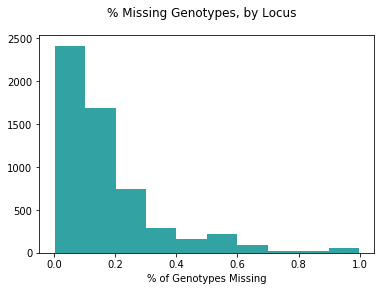

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(overall_missing_data, color="darkcyan", alpha= 0.80)
plt.suptitle("% Missing Genotypes, by Locus")
plt.xlabel("% of Genotypes Missing")
plt.show()

In [17]:
plt.close()

<br>
<br>


---------------------------

<br>
<br>
#### 2/12/2018

### Filtering individuals FIRST, then filter Loci

In [1]:
cd ../

/mnt/hgfs/PCod-Compare-repo/notebooks


In [2]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [3]:
cd scripts/PostStacksFiltering/

/mnt/hgfs/PCod-Compare-repo/scripts/PostStacksFiltering


In [5]:
!python filter_individs_missing_data.py -h

usage: filter_individs_missing_data.py [-h] [-f INPUT] [-og OUTPUT_GOOD]
                                       [-ob OUTPUT_BAD]
                                       [-op OUTPUT_PROPORTIONS]
                                       [-s STACKS_PATH] [-p PERCENT]

filter individuals for missing data. assumes input file has individuals as
column headers

optional arguments:
  -h, --help            show this help message and exit
  -f INPUT, --input INPUT
                        genotype file in 2 x 2 matrix
  -og OUTPUT_GOOD, --output_good OUTPUT_GOOD
                        output file containing 'good' loci
  -ob OUTPUT_BAD, --output_bad OUTPUT_BAD
                        output file containing 'bad' loci
  -op OUTPUT_PROPORTIONS, --output_proportions OUTPUT_PROPORTIONS
                        output file containing the missing data per individual
  -s STACKS_PATH, --stacks_path STACKS_PATH
                        path to the directory containing your stacks files
  -p PERCENT, --percen

** FILTER WITH 0.5**

In [8]:
!python filter_individs_missing_data_afterMAF.py \
-f batch_8_MB_filteredMAF.txt \
-og batch_8_MB_filteredMAF_filteredIndivids50.txt \
-ob batch_8_MB_filteredMAF_filteredIndivids50_BAD.txt \
-op batch_8_MB_filteredMAF_filteredIndivids50_Freqs.txt \
-s ../../stacks_b8_wgenome_r05/populations_m10 \
-p 0.50

Transposing matrix...
calculating which individuals are missing too much data...
Deleting temporary file...
writing individuals to files...
done.
Total individuals processed:  679
Individuals retained:  618
Individuals removed:  61
Missing data info per individual can be found in the 'proportions' output file.


*Note - had to manually remove "\n" from last line!*

In [17]:
!python FilterLoci_by_MissingValues_wFreqs_afterIndivid_b8.py \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci30.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci30_goodFreqs.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci30_BAD.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci30_badFreqs.txt \
0.30

Transposing matrix...
processed 5694 loci
Number of loci removed: 1989


In [18]:
5694-1989

3705

In [19]:
!python FilterLoci_by_MissingValues_wFreqs_afterIndivid_b8.py \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci50.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci50_goodFreqs.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci50_BAD.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids50_filteredLoci50_badFreqs.txt \
0.50

Transposing matrix...
processed 5694 loci
Number of loci removed: 972


In [20]:
5694-972

4722

**FILTER WITH 0.3**

In [21]:
!python filter_individs_missing_data_afterMAF.py \
-f batch_8_MB_filteredMAF.txt \
-og batch_8_MB_filteredMAF_filteredIndivids30.txt \
-ob batch_8_MB_filteredMAF_filteredIndivids30_BAD.txt \
-op batch_8_MB_filteredMAF_filteredIndivids30_Freqs.txt \
-s ../../stacks_b8_wgenome_r05/populations_m10 \
-p 0.30

Transposing matrix...
calculating which individuals are missing too much data...
Deleting temporary file...
writing individuals to files...
done.
Total individuals processed:  679
Individuals retained:  550
Individuals removed:  129
Missing data info per individual can be found in the 'proportions' output file.


*Note - had to manually remove "\n" from last line!*

In [23]:
!python FilterLoci_by_MissingValues_wFreqs_afterIndivid_b8_P.py \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids30.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids30_filteredLoci50.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids30_filteredLoci50_goodFreqs.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids30_filteredLoci50_BAD.txt \
../../stacks_b8_wgenome_r05/populations_m10/batch_8_MB_filteredMAF_filteredIndivids30_filteredLoci50_badFreqs.txt \
0.50

Transposing matrix...
processed 5694 loci
Number of loci removed: 838


In [24]:
5694-838

4856